In [1]:
import nltk
import re
import string
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nishthagoyal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nishthagoyal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nishthagoyal/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/nishthagoyal/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Word Tokens: ['the', 'gym', 'is', 'more', 'than', 'a', 'place', 'to', 'lift', 'weights—it', '’', 's', 'a', 'hub', 'of', 'transformation', 'where', 'discipline', 'shapes', 'both', 'body', 'and', 'mind', 'every', 'rep', 'sprint', 'or', 'stretch', 'is', 'a', 'step', 'toward', 'breaking', 'personal', 'barriers', 'and', 'building', 'resilience', 'the', 'energy', 'of', 'shared', 'effort', 'turns', 'strangers', 'into', 'motivators', 'pushing', 'each', 'other', 'beyond', 'perceived', 'limits', 'whether', 'chasing', 'strength', 'endurance', 'or', 'mental', 'clarity', 'progress', 'thrives', 'in', 'the', 'balance', 'of', 'challenge', 'and', 'consistency', 'here', 'sweat', 'becomes', 'a', 'testament', 'to', 'commitment', 'and', 'small', 'efforts', 'compound', 'into', 'lasting', 'change', 'the', 'gym', 'isn', '’', 't', 'just', 'about', 'fitness', 'it', '’', 's', 'where', 'potential', 'meets', 'persistence']
Sentence Tokens: ['The gym is more than a place to lift weights—it’s a hub of transformation

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nishthagoyal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Axes: title={'center': 'Top Words'}, xlabel='Samples', ylabel='Counts'>

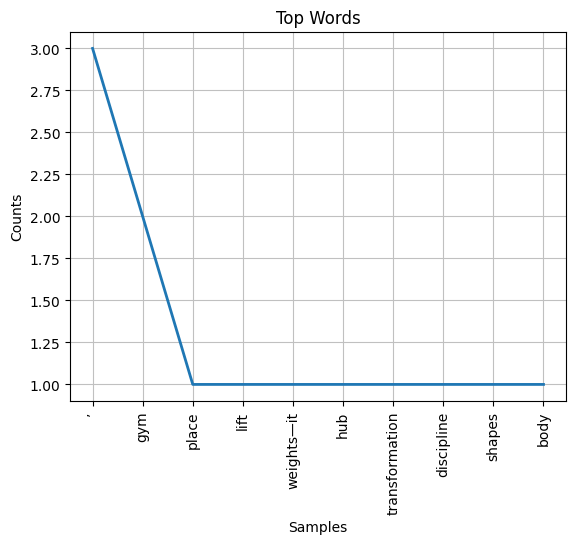

In [6]:
## ques 1
text="The gym is more than a place to lift weights—it’s a hub of transformation where discipline shapes both body and mind. Every rep, sprint, or stretch is a step toward breaking personal barriers and building resilience. The energy of shared effort turns strangers into motivators, pushing each other beyond perceived limits. Whether chasing strength, endurance, or mental clarity, progress thrives in the balance of challenge and consistency. Here, sweat becomes a testament to commitment, and small efforts compound into lasting change. The gym isn’t just about fitness; it’s where potential meets persistence."
text_lower=text.lower()
text_clean=text_lower.translate(str.maketrans('','',string.punctuation))
from nltk.tokenize import word_tokenize,sent_tokenize
word_tokens=word_tokenize(text_clean)
sent_tokens=sent_tokenize(text)
print("Word Tokens:", word_tokens)
print("Sentence Tokens:", sent_tokens)
# using split()
words_split=text_clean.split()
print("using split:",words_split)
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words= set(stopwords.words('english'))
filtered_words=[w for w in word_tokens if w.lower() not in stop_words]
print("filtered words:",filtered_words)
from nltk import FreqDist
fd=FreqDist(filtered_words)
fd.plot(10,title="Top Words")


In [7]:
## ques 2
alphabets=re.findall(r'\b[a-zA-Z]+\b',text)
stop_words= set(stopwords.words('english'))
filtered_words=[w for w in word_tokens if w.lower() not in stop_words]
print("filtered words:",filtered_words)
from nltk.stem import PorterStemmer,WordNetLemmatizer
ps=PorterStemmer()
stemmed= [ps.stem(word) for word in filtered_words]
print("stemmed word:",stemmed)
lm=WordNetLemmatizer()
lemmatized=[lm.lemmatize(word) for word in filtered_words]
print("lemmatized word:",lemmatized)
comparison = list(zip(filtered_words, stemmed, lemmatized))
for original, stem, lemma in comparison:
    print(f"{original:8} → Stem: {stem:8} | Lemma: {lemma}")
## stemming is preffered when speed is critical and minor inaccuracies are acceptable
## lemmatization is preffered when word precision matters,for semantic analysis,in customer feedback processing

    


filtered words: ['gym', 'place', 'lift', 'weights—it', '’', 'hub', 'transformation', 'discipline', 'shapes', 'body', 'mind', 'every', 'rep', 'sprint', 'stretch', 'step', 'toward', 'breaking', 'personal', 'barriers', 'building', 'resilience', 'energy', 'shared', 'effort', 'turns', 'strangers', 'motivators', 'pushing', 'beyond', 'perceived', 'limits', 'whether', 'chasing', 'strength', 'endurance', 'mental', 'clarity', 'progress', 'thrives', 'balance', 'challenge', 'consistency', 'sweat', 'becomes', 'testament', 'commitment', 'small', 'efforts', 'compound', 'lasting', 'change', 'gym', '’', 'fitness', '’', 'potential', 'meets', 'persistence']
stemmed word: ['gym', 'place', 'lift', 'weights—it', '’', 'hub', 'transform', 'disciplin', 'shape', 'bodi', 'mind', 'everi', 'rep', 'sprint', 'stretch', 'step', 'toward', 'break', 'person', 'barrier', 'build', 'resili', 'energi', 'share', 'effort', 'turn', 'stranger', 'motiv', 'push', 'beyond', 'perceiv', 'limit', 'whether', 'chase', 'strength', 'endu

In [14]:
## ques 3
text2 = [
    "Stock market hits record high amid economic growth",
    "Climate change summit reaches new agreement",
    "Tech company launches revolutionary AI product"
]
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
X=cv.fit_transform(text2)
print(cv.get_feature_names_out())
print(X.toarray())
tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform(text2)
feature_names=tfidf.get_feature_names_out()
print(tfidf_matrix.toarray())
# Extract top 3 keywords per text
import numpy as np

for i in range(len(text2)):
    row = tfidf_matrix[i].toarray()[0]
    top_indices = np.argsort(row)[-3:][::-1]  # top 3 highest TF-IDF values
    top_keywords = [feature_names[idx] for idx in top_indices]
    print(f"Top 3 keywords for text {i+1}: {top_keywords}")


['agreement' 'ai' 'amid' 'change' 'climate' 'company' 'economic' 'growth'
 'high' 'hits' 'launches' 'market' 'new' 'product' 'reaches' 'record'
 'revolutionary' 'stock' 'summit' 'tech']
[[0 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0]
 [1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0]
 [0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 1]]
[[0.         0.         0.35355339 0.         0.         0.
  0.35355339 0.35355339 0.35355339 0.35355339 0.         0.35355339
  0.         0.         0.         0.35355339 0.         0.35355339
  0.         0.        ]
 [0.40824829 0.         0.         0.40824829 0.40824829 0.
  0.         0.         0.         0.         0.         0.
  0.40824829 0.         0.40824829 0.         0.         0.
  0.40824829 0.        ]
 [0.         0.40824829 0.         0.         0.         0.40824829
  0.         0.         0.         0.         0.40824829 0.
  0.         0.40824829 0.         0.         0.40824829 0.
  0.         0.40824829]]
Top 3 keywords for text 1: ['hits', 'growth'

In [19]:
## ques 4
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
text1 = """Artificial Intelligence enables machines to learn from data and perform human-like tasks.
AI is widely used in healthcare, finance, and customer service. It relies on algorithms and large datasets to make predictions."""

text2 = """Blockchain is a decentralized technology that ensures data security and transparency.
It is commonly used in cryptocurrencies like Bitcoin and Ethereum. Each transaction is stored in a distributed ledger."""
def preprocess(text):
    text=text.lower()
    text=re.sub(r'[^a-z\s]','',text)
    tokens=text.split()
    return tokens 

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)
# Jaccard Similarity
set1=set(tokens1)
set2=set(tokens2)
union=len(set1 | set2)
intersection=len(set1 & set2)
jaccard_similarity=intersection/union
print("Jaccard Similarity:",jaccard_similarity)
# Cosine Similarity
tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform([text1,text2])
cos_sim=cosine_similarity(tfidf_matrix[0:1],tfidf_matrix[1:2])[0][0]
print("cosine similarity:",cos_sim)
# Analysis
if cos_sim > jaccard_similarity:
    print("Cosine Similarity provides better semantic insight between the texts.")
else:
    print("Jaccard Similarity gives better insight in this case.")

Jaccard Similarity: 0.1276595744680851
cosine similarity: 0.2538795505544794
Cosine Similarity provides better semantic insight between the texts.


In [27]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.3/624.3 kB 10.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


Review: This phone has amazing battery life and a great camera!
polarity: 0.8
subjectivity: 0.825
sentiment: Positive
Review: The product was okay, but the delivery was slow.
polarity: 0.09999999999999998
subjectivity: 0.44999999999999996
sentiment: Neutral
Review: Terrible customer service. I'm very disappointed.
polarity: -0.9875
subjectivity: 0.9875
sentiment: Negative
Review: Absolutely love this! It works better than expected.
polarity: 0.3416666666666666
subjectivity: 0.5
sentiment: Positive
Review: Not bad, but not great either. Could be improved.
polarity: -0.02500000000000005
subjectivity: 0.7083333333333333
sentiment: Neutral


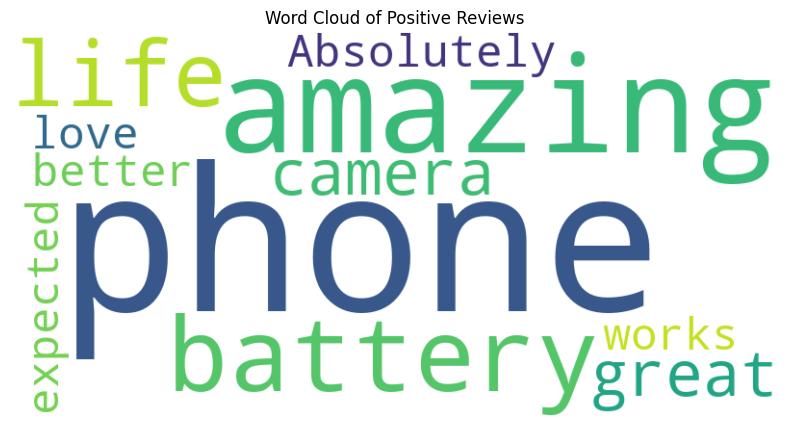

In [30]:
## ques 5
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
reviews = [
    "This phone has amazing battery life and a great camera!",
    "The product was okay, but the delivery was slow.",
    "Terrible customer service. I'm very disappointed.",
    "Absolutely love this! It works better than expected.",
    "Not bad, but not great either. Could be improved."
]

def analyze_sentiment(review):
    blob=TextBlob(review)
    polarity=blob.sentiment.polarity
    subjectivity=blob.sentiment.subjectivity
    if polarity > 0.1:
        sentiment = "Positive"
    elif polarity < -0.1:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return polarity,subjectivity,sentiment

analysis_results = []
positive_reviews = ""
for review in reviews:
    polarity, subjectivity, sentiment = analyze_sentiment(review)
    analysis_results.append((review, polarity, subjectivity, sentiment))
    if sentiment == "Positive":
        positive_reviews += " " + review

for result in analysis_results:
    print("Review:",result[0])
    print("polarity:",result[1])
    print("subjectivity:",result[2])
    print("sentiment:",result[3])

wordcloud=WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Positive Reviews")
plt.show()

In [21]:
pip install keras

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 667.6/667.6 kB 4.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.5/252.5 MB 3.7 MB/s eta 0:00:0000:0100:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 3.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 3.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 3.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 3.6 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [25]:
## ques 6
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
import numpy as np

# Step 1: Define your training paragraph
text = """Artificial Intelligence is transforming the world by automating tasks and improving decision-making processes.
From healthcare diagnostics to self-driving cars, AI is revolutionizing industries. Machine learning, a subset of AI, 
enables systems to learn from data and adapt over time. Deep learning further enhances this capability by using neural networks 
with multiple layers. Natural language processing helps computers understand and generate human language. As AI continues 
to evolve, ethical concerns about privacy, fairness, and transparency grow. Businesses are investing heavily in AI research 
to stay competitive and innovative. The future promises smarter systems, better user experiences, and more efficient technologies."""

# Step 2: Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Step 3: Create input sequences
input_sequences = []
words = text.lower().split()
for i in range(1, len(words)):
    n_gram_sequence = words[:i+1]
    token_list = tokenizer.texts_to_sequences([' '.join(n_gram_sequence)])[0]
    input_sequences.append(token_list)

# Pad the sequences
max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Split predictors and label
input_sequences = np.array(input_sequences)
X, y = input_sequences[:,:-1], input_sequences[:,-1]

# Step 4: Build the model
model = Sequential()
model.add(Embedding(input_dim=total_words, output_dim=10, input_length=max_seq_len-1))
model.add(LSTM(100))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 5: Train the model
model.fit(X, y, epochs=100, verbose=0)

# Step 6: Generate new text
def generate_text(seed_text, next_words):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)
        output_word = ''
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        seed_text += ' ' + output_word
    return seed_text

# Try generating text
print("Generated text:\n", generate_text("artificial", 3))


/Users/nishthagoyal/Library/Python/3.9/lib/python/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Generated text:
 artificial intelligence intelligence world
